# Sentiment Analysis on Tweet data

In [ ]:
from time import time
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#df = pd.read_csv('training.1600000.processed.noemoticon.csv')
df_raw = pd.read_csv('data/training.1600000.processed.noemoticon.csv',encoding='latin-1',header=None)

In [51]:
df_raw.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [52]:
df_raw.columns = ["label", "time", "date", "query", "username", "text"]

In [53]:
for i in df_raw.columns: 
    print(f"For {i}\n {df_raw[i].value_counts()} \n\n")

For label
 4    800000
0    800000
Name: label, dtype: int64 


For time
 1753678185    2
1678693526    2
1835870889    2
2190104868    2
1984377787    2
             ..
2056931811    1
2212131300    1
2188589814    1
1983537638    1
1964587131    1
Name: time, Length: 1598315, dtype: int64 


For date
 Mon Jun 15 12:53:14 PDT 2009    20
Fri May 29 13:40:04 PDT 2009    17
Fri May 22 05:10:17 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri Jun 05 11:05:33 PDT 2009    16
                                ..
Sat May 16 23:03:13 PDT 2009     1
Sat Jun 20 22:38:54 PDT 2009     1
Mon Jun 15 21:48:28 PDT 2009     1
Tue Apr 21 00:58:13 PDT 2009     1
Thu Jun 18 10:53:08 PDT 2009     1
Name: date, Length: 774363, dtype: int64 


For query
 NO_QUERY    1600000
Name: query, dtype: int64 


For username
 lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
hannerdino           1
rdabdoub             1
hanami91

In [54]:
df_raw['label'].value_counts()

4    800000
0    800000
Name: label, dtype: int64

In [56]:
# Ommiting every column except for the text and the label, as we won't need any of the other information
df = df_raw[['label', 'text']]
df.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [57]:
# Separating positive and negative rows
df_pos = df[df['label'] == 4]
df_neg = df[df['label'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


In [58]:
# Only retaining 1/4th of our data from each output group
# Feel free to alter the dividing factor depending on your workspace
# 1/64 is a good place to start if you're unsure about your machine's power
df_pos = df_pos.iloc[:int(len(df_pos)/4)]
df_neg = df_neg.iloc[:int(len(df_neg)/4)]
print(len(df_pos), len(df_neg))

200000 200000


In [59]:
# Concatinating both positive and negative groups and storing them back into a single dataframe
df = pd.concat([df_pos, df_neg])
len(df)

400000

# 2. Cleaning and Processing the Data 
## 2.1. Tokenization

## 2.2. Lemmatization

## 2.3. Cleaning the Data 

In [62]:
start_time = time()

from nltk.tokenize import TweetTokenizer
# The reduce_len parameter will allow a maximum of 3 consecutive repeating characters, while trimming the rest
# For example, it will tranform the word: 'Helloooooooooo' to: 'Hellooo'
tk = TweetTokenizer(reduce_len=True)

data = []

# Separating our features (text) and our labels into two lists to smoothen our work
X = df['text'].tolist()
Y = df['label'].tolist()

# Building our data list, that is a list of tuples, where each tuple is a pair of the tokenized text
# and its corresponding label
for x, y in zip(X, Y):
    if y == 4:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))
        
# Printing the CPU time and the first 5 elements of our 'data' list
print('CPU Time:', time() - start_time)
data[:5]

CPU Time: 38.41495394706726


[(['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!'],
  1),
 (['im',
   'meeting',
   'up',
   'with',
   'one',
   'of',
   'my',
   'besties',
   'tonight',
   '!',
   'Cant',
   'wait',
   '!',
   '!',
   '-',
   'GIRL',
   'TALK',
   '!',
   '!'],
  1),
 (['@DaRealSunisaKim',
   'Thanks',
   'for',
   'the',
   'Twitter',
   'add',
   ',',
   'Sunisa',
   '!',
   'I',
   'got',
   'to',
   'meet',
   'you',
   'once',
   'at',
   'a',
   'HIN',
   'show',
   'here',
   'in',
   'the',
   'DC',
   'area',
   'and',
   'you',
   'were',
   'a',
   'sweetheart',
   '.'],
  1),
 (['Being',
   'sick',
   'can',
   'be',
   'really',
   'cheap',
   'when',
   'it',
   'hurts',
   'too',
   'much',
   'to',
   'eat',
   'real',
   'food',
   'Plus',
   ',',
   'your',
   'friends',
   'make',
   'you',
   'soup'],
  1),
 (['@LovesBrooklyn2', 'he', 'has', 'that', 'effect', 'on', 'everyone'], 1)]

In [70]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('averaged_perceptron_tagger')
# Previewing the pos_tag() output
print(pos_tag(data[0][0]))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nguyenthientoan/nltk_data...


[('I', 'PRP'), ('LOVE', 'VBP'), ('@Health4UandPets', 'NNS'), ('u', 'JJ'), ('guys', 'NNS'), ('r', 'VBP'), ('the', 'DT'), ('best', 'JJS'), ('!', '.'), ('!', '.')]


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [67]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        # First, we will convert the pos_tag output tags to a tag format that the WordNetLemmatizer can interpret
        # In general, if a tag starts with NN, the word is a noun and if it stars with VB, the word is a verb.
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence


In [72]:
import nltk
nltk.download('wordnet')
# Previewing the WordNetLemmatizer() output
print(lemmatize_sentence(data[0][0]))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nguyenthientoan/nltk_data...


['I', 'LOVE', '@Health4UandPets', 'u', 'guy', 'r', 'the', 'best', '!', '!']


In [74]:
import re, string
import nltk
nltk.download('stopwords')
# Stopwords are frequently-used words (such as “the”, “a”, “an”, “in”) that do not hold any meaning useful to extract sentiment.
# If it's your first time ever using nltk, you can download nltk's stopwords using: nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')

# A custom function defined in order to fine-tune the cleaning of the input text. This function is highly dependent on each usecase.
# Note: Only include misspelling or abbreviations of commonly used words. Including many minimally present cases would negatively impact the performance. 
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25':
        return ''
    return token

# This function will be our all-in-one noise removal function
def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Eliminating the token if it is a link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        cleaned_token = cleaned(token.lower())
        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

# Prevewing the remove_noise() output
print(remove_noise(data[0][0]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nguyenthientoan/nltk_data...


['love', 'guy', 'best']


[nltk_data]   Unzipping corpora/stopwords.zip.


In [75]:
start_time = time()

# As the Naive Bayesian classifier accepts inputs in a dict-like structure,
# we have to define a function that transforms our data into the required input structure
def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

# Removing noise from all the data
for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

final_data = []

# Transforming the data to fit the input structure of the Naive Bayesian classifier
for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))
    
print('Data Prepared for model, CPU Time:', time() - start_time)

# Previewing our final (tokenized, cleaned and lemmatized) data list
final_data[:5]

Removed Noise, CPU Time: 367.2491810321808
Data Prepared for model, CPU Time: 2.060051918029785


[({'love': True, 'guy': True, 'best': True}, 1),
 ({'meet': True,
   'one': True,
   'besties': True,
   'tonight': True,
   'cant': True,
   'wait': True,
   'girl': True,
   'talk': True},
  1),
 ({'thanks': True,
   'twitter': True,
   'add': True,
   'sunisa': True,
   'get': True,
   'meet': True,
   'hin': True,
   'show': True,
   'area': True,
   'sweetheart': True},
  1),
 ({'sick': True,
   'really': True,
   'cheap': True,
   'hurt': True,
   'much': True,
   'eat': True,
   'real': True,
   'food': True,
   'plus': True,
   'friend': True,
   'make': True,
   'soup': True},
  1),
 ({'effect': True, 'everyone': True}, 1)]

# 3. Visualizing the Data

In [77]:
from wordcloud import WordCloud, STOPWORDS

start_time = time()

positive_words = []
negative_words = []

# Separating out positive and negative words (i.e., words appearing in negative and positive tweets),
# in order to visualize each set of words independently
for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    else:
        negative_words.extend(cleaned_tokens_list[i][0])

# Defining our word cloud drawing function
def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(positive_words, 'white')
print("Negative words")
wordcloud_draw(negative_words)        

print('CPU Time:', time() - start_time)

Positive words


AttributeError: 'TransposedFont' object has no attribute 'getbbox'

# 4. Naive Bayesian Model 
## 4.1. Splitting the Data 

## 4.2. Training the Model 

## 4.3. Testing the Model

## 4.4. Asserting the Model

In [78]:
# As our data is currently ordered by label, we have to shuffle it before splitting it
# .Random(140) randomizes our data with seed = 140. This guarantees the same shuffling for every execution of our code
# Feel free to alter this value or even omit it to have different outputs for each code execution
random.Random(140).shuffle(final_data)

# Here we decided to split our data as 90% train data and 10% test data
# Once again, feel free to alter this number and test the model accuracy
trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

In [84]:
train_data

[({'home': True,
   'still': True,
   'laugh': True,
   'swamp': True,
   'know': True,
   'mat': True,
   'beat': True,
   "he's": True,
   'mate': True},
  1),
 ({'borning': True,
   'thats': True,
   'cold': True,
   'virus': True,
   'bung': True,
   'eye': True,
   'squinty': True,
   '...': True,
   'bah': True},
  0),
 ({'day': True,
   'yesterday': True,
   'probably': True,
   'today': True,
   'wish': True,
   'take': True,
   'top': True,
   'jeep': True,
   'need': True,
   'help': True,
   'haha': True,
   'fricken': True,
   'hot': True},
  0),
 ({'lie': True, 'bed': True, 'big': True, 'hangover': True}, 0),
 ({"th'as": True, 'cause': True, 'joemac': True, 'sing': True}, 1),
 ({'miss': True}, 0),
 ({'miss': True, 'mine': True}, 0),
 ({'yay': True, 'well': True}, 1),
 ({'doof': True,
   'music': True,
   'street': True,
   'thump': True,
   'herd': True,
   'like': True,
   'bunch': True,
   'elephant': True,
   'run': True,
   'away': True,
   'mouse': True,
   'painful':

In [83]:
start_time = time()

from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

# Output the model accuracy on the train and test data
print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

# Output the words that provide the most information about the sentiment of a tweet.
# These are words that are heavily present in one sentiment group and very rarely present in the other group.
print(classifier.show_most_informative_features(20))

print('\nCPU Time:', time() - start_time)

Accuracy on train data: 0.8107055555555556
Accuracy on test data: 0.75555
Most Informative Features
               depressed = True                0 : 1      =     49.0 : 1.0
               toothache = True                0 : 1      =     45.0 : 1.0
                    roni = True                0 : 1      =     34.3 : 1.0
                 unhappy = True                0 : 1      =     31.4 : 1.0
                   strep = True                0 : 1      =     31.0 : 1.0
                  asthma = True                0 : 1      =     26.3 : 1.0
                 unloved = True                0 : 1      =     25.0 : 1.0
                  #movie = True                1 : 0      =     23.0 : 1.0
                  gutted = True                0 : 1      =     22.3 : 1.0
                   hates = True                0 : 1      =     21.9 : 1.0
               heartburn = True                0 : 1      =     21.7 : 1.0
                     bom = True                1 : 0      =     21.4 : 1.0


In [85]:
custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

0


In [88]:
custom_tweet = "I love the show today! It was amazing."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


Nevertheless, this model has various shortcomings.

As the model only evaluates sentences at an independent word level, it performs very poorly when it comes to negations and other multi-words constructs. For example, is the model gets the following input: The concert was good!, it would simply take each individual word (here, and after cleaning the input, \"concert\" and \"good\") and calculate each word's probability to be either positive and negative and finally multiply everything together. Thus, we would expect the model to perform poorly on examples such: The concert was not good! or I'm not very happy :(.

In [89]:
custom_tweet = "The reward for good work is more work!"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


In [90]:
custom_tweet = "Not good"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


In [91]:
from sklearn import metrics

# Storing all desired values in a list
y = [test_data[i][1] for i in range(len(test_data))]
# Storing all probabilities of having a positive sentiment in a list
probs = [classifier.prob_classify(test_data[i][0]).prob(1) for i in range(len(test_data))]

# Making sure both values a re equal
print(len(y), len(probs))

# performing the roc curve calculations
fpr, tpr, thresholds = metrics.roc_curve(y, probs)

# Printing the Area Under Curve (AUC) of the ROC curve (the closer to 1, the better)
auc = metrics.roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

40000 40000
AUC: 0.834


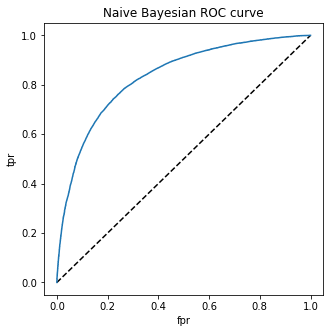

In [92]:
# Plotting the ROC Curve
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayesian ROC curve')
plt.show()

In [93]:
# Creating a confusion matrix (this specific confusion matrix function accepts numpy arrays rather than python lists)

probs = [classifier.classify(test_data[i][0]) for i in range(len(test_data))]
y = np.asarray(y)
probs = np.asarray(probs)
pd.crosstab(y, probs, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,16528,3452,19980
1,6326,13694,20020
All,22854,17146,40000


# 5. Deep Learning Model - LSTM 


## 5.1. Data Pre-processing
In order to feed our text data to our LSTM model, we'll have to go through several extra preprocessing steps.

Most neural networks expect numbers as inputs. Thus, we'll have to convert our text data to numerical data.

One way of doing so would be the following: collect all possible words in our dataset and generate a dictionary containing all unique words in our text corpus, then sort all of these words alphabetically and assign to each word an index. So for example, let's say our dictionary's length turned out to be 100,000 words. The word "a" would be assigned the index 0, the word "aaron" would be assigned the index 1, and so on, until we reach the last word in our dictionary, say "zulu", and assign to it the index 99,999. Great! Now each word is represented with a numerical value, and we can feed the numerical value of each word to our model.

It turns out that this step alone is not enough to be able to train good Deep Learning models. If you think about it, when the model reads an input 20,560 and then another input 20,561 for example, it would assume that these values are "close". However, those inputs could be the indexes of totally unrelated words, such as "cocktail" and "code", appearing right next to each other in the sorted dictionary. Hoping I've convinced you with this example, and that you hopefully believe that "cocktail" and "code" are, and should always be, completely unrelated, let's take a look at one solution that is widely adopted in various NLP implementations.

Also, one simple solution for this problem is to use One-Hot vectors to represent each word, but we won't bother with One-Hot vectors in this notebook, as we will be discussing a much more robust solution.



### 5.1.1. Word Embeddings
Word embeddings are basically a way for us to convert words to representational vectors. What I mean by this is that, instead of mapping each word to an index, we want to map each word to a vector of real numbers, representing this word.

The goal here is to be able to generate similar or close representational vectors for words that have similar meaning. For example, when feeding the words "excited" and "thrilled" to the word embedding model, we would like the model to output "close" representations for both words. Whereas if we feed the words "excited" and "Java", we would like the model to output "far" representations for both words.

The concept of "close" and "far" vectors is actually implemented using the cosine similarity. In fact, word embeddings and distance between words or relation between words is an immense discussion in its own. So I'll just keep my explanation to a minimum in this notebook.

https://papers.nips.cc/paper/2016/file/a486cd07e4ac3d270571622f4f316ec5-Paper.pdf 
### 5.1.2. Global Vectors for Word Representation (GloVe)

Building and training good word embeddings is a tremendous process requiring millions of data samples and exceptional computational power. Luckily for us, folks at the University of Stanford already did this for us and published their results for free on their official website! Their model is called GloVe, and it's going to be what we'll use in the next steps


### 5.1.3. Data Padding

Further in our training we would like to speed the process up by splitting data into mini-batches. Batch learning is basically the process of training on several examples at the same time, which greatly decreases the training time!

However, and in order to be able to utilize batch learning, keras (and similarly to most machine learning frameworks) requires all data within the same batch to have the same length or dimension. Whereas in our text data, each example could have a variable sentence length. In order to overcome this issue, we will go over all of our data, and calculate the length of the longest phrase (in terms of words). Then, we will 0-pad all of the data sequences so that they will all have the same max_len calculated.

Let's consider a max_len of 5 words, and the two sentences I love you and I will be ready. First, we will convert these sentences to their corresponding index representation, then 0-pad them for the max_len 5. After we've done that, we can now feed the resulting lists into a word embedding layer in order to get the representational vectors for each index (representing a given word).


## 5.2. Data Transformation

## 5.3. Building the Model

## 5.4. Training the Model

## 5.5. Investigating Possibilties to Improve the Model

## 5.6. Predicting on Custom Data 


In [108]:
!wget http://nlp.stanford.edu/data/glove.6B.zip # find way to download those 'glove.6B.zip'
!unzip glove.6B.zip
# i access Kaggle to load the 'glove.6B.zip'from 'https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt' 

/bin/bash: wget: command not found
unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


In [99]:
# Defining a handy function in order to load a given glove file

def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

GloVe embeddings come in various flavors. They basically differ depending on the type of data they were trained on, the length of the vocabulary, the size of the representational vectors and so on.

We've previously downloaded GloVe vectors trained on 6 Billion tokens and having a dictionary, or vocabulary, size of 400,001 unique words. Believe it or not, this is the smallest model from GloVe! Next we will load the vectors that are 50-dimensional.

In [107]:
# Loading the 50-dimensional GloVe embeddings
# This method will return three dictionaries:
# * word_to_index: a dictionary mapping from words to their indices in the vocabulary
# * index_to_word: dictionary mapping from indices to their corresponding words in the vocabulary
# * word_to_vec_map: dictionary mapping words to their GloVe vector representation
# Note that there are 400,001 words, with the valid indices ranging from 0 to 400,000

word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.100d.txt')

In [139]:
word_to_index['unk']

372306

In [138]:
word_to_vec_map['hello'] 

array([ 0.26688  ,  0.39632  ,  0.6169   , -0.77451  , -0.1039   ,
        0.26697  ,  0.2788   ,  0.30992  ,  0.0054685, -0.085256 ,
        0.73602  , -0.098432 ,  0.5479   , -0.030305 ,  0.33479  ,
        0.14094  , -0.0070003,  0.32569  ,  0.22902  ,  0.46557  ,
       -0.19531  ,  0.37491  , -0.7139   , -0.51775  ,  0.77039  ,
        1.0881   , -0.66011  , -0.16234  ,  0.9119   ,  0.21046  ,
        0.047494 ,  1.0019   ,  1.1133   ,  0.70094  , -0.08696  ,
        0.47571  ,  0.1636   , -0.44469  ,  0.4469   , -0.93817  ,
        0.013101 ,  0.085964 , -0.67456  ,  0.49662  , -0.037827 ,
       -0.11038  , -0.28612  ,  0.074606 , -0.31527  , -0.093774 ,
       -0.57069  ,  0.66865  ,  0.45307  , -0.34154  , -0.7166   ,
       -0.75273  ,  0.075212 ,  0.57903  , -0.1191   , -0.11379  ,
       -0.10026  ,  0.71341  , -1.1574   , -0.74026  ,  0.40452  ,
        0.18023  ,  0.21449  ,  0.37638  ,  0.11239  , -0.53639  ,
       -0.025092 ,  0.31886  , -0.25013  , -0.63283  , -0.0118

In [143]:
def cosine_similarity(u, v):
    dot = np.dot(u, v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    cosine_similarity = dot / (norm_u * norm_v)
    return cosine_similarity

In [144]:
cosine_similarity(word_to_vec_map['cucumber'], word_to_vec_map['tomato'])

0.7695537186699624

In [145]:
cosine_similarity(word_to_vec_map['cucumber'], word_to_vec_map['phone'])

0.015916120364748525

## 5.2. Data Transformation

In [159]:
start_time = time()

unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

        
# Here we will utilize the already computed 'cleaned_tokens_list' variable
   
print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)

X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))

for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:5])
print(Y[:5])

Removed Noise, CPU Time: 0.001209259033203125
max_len: 25
Data Prepared for model, CPU Time: 4.779711961746216
[[226278. 169725.  74390.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.]
 [239785. 269953. 372306. 361859.  91041. 382320. 161844. 352214.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.]
 [357161. 368306.  46173. 372306. 160418. 239785. 179025. 329974.  58999.
  349437.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.]
 [330826. 302352.  97698. 184322. 251645. 132701. 302292. 151204. 286963.
  154049. 231458. 338210.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.]
 [133896. 141948.      0.      0.      0.      0.      0.    

## 5.3. Building the Model

In [161]:
import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers import Embedding
from sklearn.model_selection import train_test_split

In [162]:
# Defining a function that will initialize and populate our embedding layer

def pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len):
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["unk"].shape[0] #50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False, input_shape=(max_len,))
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [163]:
# Defining a sequencial model composed of firstly the embedding layer, than a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates our desired output betwene 0 and 1.

model = Sequential()

model.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           40000100  
                                                                 
 bidirectional (Bidirectiona  (None, 25, 256)          234496    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 40,629,093
Trainable params: 628,993
Non-trainable params: 40,000,100
_________________________________________________________________


In [164]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [166]:
len(X_train)

320000

In [167]:
len(X_test)

80000

## 5.4. Training the Model

In [168]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
2500/2500 [==============================] - 643s 254ms/step - loss: 0.5294 - accuracy: 0.7309 - val_loss: 0.4930 - val_accuracy: 0.7553
Epoch 2/20
2500/2500 [==============================] - 650s 260ms/step - loss: 0.4877 - accuracy: 0.7607 - val_loss: 0.4797 - val_accuracy: 0.7669
Epoch 3/20
2500/2500 [==============================] - 634s 253ms/step - loss: 0.4684 - accuracy: 0.7731 - val_loss: 0.4739 - val_accuracy: 0.7731
Epoch 4/20
2500/2500 [==============================] - 523s 209ms/step - loss: 0.4504 - accuracy: 0.7845 - val_loss: 0.4711 - val_accuracy: 0.7731
Epoch 5/20
2500/2500 [==============================] - 523s 209ms/step - loss: 0.4301 - accuracy: 0.7963 - val_loss: 0.4747 - val_accuracy: 0.7726
Epoch 6/20
2500/2500 [==============================] - 1851s 741ms/step - loss: 0.4058 - accuracy: 0.8102 - val_loss: 0.4932 - val_accuracy: 0.7663
Epoch 7/20
2500/2500 [==============================] - 2545s 1s/step - loss: 0.3763 - accuracy: 0.8259 - val_l

In [ ]:
# Defnining a handy function in order to plot various models accuracy and loss progress

def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)

The training accuracy is sky-rocketing, exceeding 95% after 20 epochs! However, the validation accuracy increased slightly in the early epochs, reaching 76.7% on the 5th epoch, after which it experienced a consistently gradual decrease. In data science, we would classify this model as having very high variance and low bias. This is also referred to as "over-fitting".

Over-Fitting is basically the phenomenon where the model's performance on validation data starts degrading, while still achieving great progress on the test set. In other words, the model is doing exceptionally well on learning specific examples it has been trained on, but is failing to generalize to data it never saw in its training phase.

## 5.5. Investigating Possibilties to Improve the Model

Several directions could be undertaken at this stage in order to improve our model's performance. Arguably, the most promising direction to firstly look into is to introduce some kind of regularization in our model in order to try to reduce the clearly apparent over-fitting problem our model is facing. Let's specifically look at the dropout regularization technique


Regularization is the process of preventing a model from over-fitting the training data. You can conceptualize regularization as being a tool we use in order to render our model less sensible to every detail, and possibly outliers, in the training data. This should allow the model to better generalize and have a better performance on the validation data, or any data it wasn't trained on.

Dropout is one of the many regularization techniques, and also one of the simplest to implement and most commonly used. Basically, what dropout does is that it randomly eliminates several (based on a parametrized percentage rate) neurons connections in the network, rendering the model less complex, and forcing the model to only look at part of a given example. The random elimination of connections in the model is repeated randomly for each example training data.

For example, let's consider the following sentences, with a dropout layer with a rate of 0.5 (50% of connections will be eliminated):

"Another kind of regularization can be directly applied to the cost function"

"This is my first ever notebook. Hope you're enjoying it so far!"

The output of the dropout layer could look like the following:

"kind of regularization be to function"

"This my notebook. you enjoying it far!"

Thus, the model will only have information on a part of the input example, and should be able to escape over-fitting particular characteristics of the training data.

### Model Building - Dropout

In [ ]:
keras.backend.clear_session()

model_dropout = Sequential()

model_dropout.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_dropout.add(Dense(units=1, activation='sigmoid'))

model_dropout.summary()

In [ ]:
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model Training - Dropout

In [ ]:
model_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

In [ ]:
plot_acc_loss(model_dropout.history)

We can clearly see the effects of adding dropout layers on the training progress. The training accuracy is progressing at a much slower pace than it previously did. Nevertheless, the validation accuracy is steadily increasing, reaching 76.85%.

Let's keep on training the model for 20 more epochs.

In [ ]:
model_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

In [ ]:
plot_acc_loss(model_dropout.history)

We can observe that the accuracy has plateaued, reaching its best validation value of 77.2%.

Thus, we can conclude that the regularization process did not really help us in our case. A tiny 0.5% improvement was observed after adding dropout to the model.

This leads us to the second direction to investigate in order to improve our model: data.

####  Inspecting the Data - Unknown Words 

As explained earlier, whenever a word is not included in the words embedding mapping, it is referred to as an unknown word, or unk. Let's count the number of words that are being flagged as unknowns in our data.

In [ ]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1

n_unk_words

200K unknown words are kind of a lot. In fact, after counting the total number of words in our data, this equates to ~7% of all words.

In [ ]:
len(unks)

In [ ]:
len(UNKS)

If you remember in the above defined function sentence_to_indices, we have incorporated a "last resort" function cleared, which eliminates contiguous similar characters. It seems like our last resort of clearing the words helped us reduce the number of unknown words by 28,000 !

In [ ]:
from collections import Counter
Counter(unks).most_common(50)

We can observe that most of the unknown words are very common words, however the word embeddings layer does not support quotes. For example, if you try to get the index of the word "i'm", you'll be prompted with a key error, whereas the word "im" is available as a valid key. Other words, such as "idk", "lmao" or "b-day" reminds us that our data comes from twitter, and we'll have to individually handle each of these words such that our words embedding layer recognise them.

#### Further data cleaning

In [ ]:
# A custom function defined in order to fine-tune the cleaning of the input text.
# This function is being "upgraded" such that it performs a more thourough cleaning of the data
# in order to better fit our words embedding layer
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow' or token == '2moro':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token in ['hahah', 'hahaha', 'hahahaha']:
        return 'haha'
    if token == "mother's":
        return "mother"
    if token == "mom's":
        return "mom"
    if token == "dad's":
        return "dad"
    if token == 'bday' or token == 'b-day':
        return 'birthday'
    if token in ["i'm", "don't", "can't", "couldn't", "aren't", "wouldn't", "isn't", "didn't", "hadn't",
                 "doesn't", "won't", "haven't", "wasn't", "hasn't", "shouldn't", "ain't", "they've"]:
        return token.replace("'", "")
    if token in ['lmao', 'lolz', 'rofl']:
        return 'lol'
    if token == '<3':
        return 'love'
    if token == 'thanx' or token == 'thnx':
        return 'thanks'
    if token == 'goood':
        return 'good'
    if token in ['amp', 'quot', 'lt', 'gt', '½25', '..', '. .', '. . .']:
        return ''
    return token


# This function will be our all-in-one noise removal function
def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token in tweet_tokens:
        # Eliminating the token if it is a link
        token = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        cleaned_token = cleaned(token.lower())
        
        if cleaned_token == "idk":
            cleaned_tokens.append('i')
            cleaned_tokens.append('dont')
            cleaned_tokens.append('know')
            continue
        if cleaned_token == "i'll":
            cleaned_tokens.append('i')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "you'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "we'll":
            cleaned_tokens.append('we')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it'll":
            cleaned_tokens.append('it')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it's":
            cleaned_tokens.append('it')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i've":
            cleaned_tokens.append('i')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you've":
            cleaned_tokens.append('you')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "we've":
            cleaned_tokens.append('we')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "they've":
            cleaned_tokens.append('they')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you're":
            cleaned_tokens.append('you')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "we're":
            cleaned_tokens.append('we')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "they're":
            cleaned_tokens.append('they')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "let's":
            cleaned_tokens.append('let')
            cleaned_tokens.append('us')
            continue
        if cleaned_token == "she's":
            cleaned_tokens.append('she')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "he's":
            cleaned_tokens.append('he')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "that's":
            cleaned_tokens.append('that')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i'd":
            cleaned_tokens.append('i')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "you'd":
            cleaned_tokens.append('you')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "there's":
            cleaned_tokens.append('there')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "what's":
            cleaned_tokens.append('what')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "how's":
            cleaned_tokens.append('how')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "who's":
            cleaned_tokens.append('who')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "y'all" or cleaned_token == "ya'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('all')
            continue

        if cleaned_token.strip() and cleaned_token not in string.punctuation: 
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens


# Prevewing the remove_noise() output
print(remove_noise(data[0][0]))

Now let's re-compute our X and Y arrays according to the newly defined remove_noise function.

In [ ]:
start_time = time()

unks = []
UNKS = []

def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res

def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

cleaned_tokens_list = []

# Removing noise from all the data, using the newly defined function
for tokens, label in data:
    x = remove_noise(tokens)
    if x:
        cleaned_tokens_list.append((x, label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)


X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))


for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:5])
print(Y[:5])

In [ ]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1

n_unk_words

That's amazing! We've managed to bring down the number of unknown words from 200K to 120K! Calculating the percentage of unknown words now, it shrank down to approximately 2.5%.

In [ ]:
from collections import Counter
Counter(unks).most_common(50)

In [ ]:
keras.backend.clear_session()

model_clean_data = Sequential()

model_clean_data.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_clean_data.add(Dense(units=1, activation='sigmoid'))

model_clean_data.summary()


In [ ]:
model_clean_data.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
model_clean_data.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)


In [ ]:
history = model_clean_data.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
y_arrow = max(val_acc)
x_arrow = val_acc.index(y_arrow) + 1
plt.annotate(str(y_arrow)[:6],
             (x_arrow, y_arrow),
             xytext=(x_arrow + 5, y_arrow + .02),
             arrowprops=dict(facecolor='orange', shrink=0.05))
plt.xticks(epochs)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
plt.show()

Wow, now that's a considerable performance gain! The model managed to reach an impressive 81.1% validation accuracy on the 5th epoch!

This goes to prove the following: The model is as good as the data.

Nonetheless, the over-fitting problem is still persistent in the model. This could be further reduced by introducing a more aggressive regularization and training the model for a much bigger number of epochs, and by also training the model on a bigger, more diverse, cleaner data.

## 5.6. Predicting on Custom Data 

In [ ]:
def sentence_to_indices(sentence_words, max_len):
    X = np.zeros((max_len))
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
        X[j] = index
    return X

def predict_custom_tweet_sentiment(custom_tweet):
    # Convert the tweet such that it can be fed to the model
    x_input = sentence_to_indices(remove_noise(tk.tokenize(custom_tweet)), max_len)
    
    # Retrun the model's prediction
    return model_clean_data.predict(np.array([x_input])).item()

In [ ]:
predict_custom_tweet_sentiment("I disliked his attitude...")

In [ ]:
predict_custom_tweet_sentiment("I'm infatuated with you")

Woohoo, our model can now easily understand the relationship between words! It managed to identify that adding a not before a happy, would completely switch its meaning!

Our model is even capable of correctly predicting the sentiment of words it never encountered during training!

The word Infatuated never appeared neither in the positive nor negative tweets. However, given that it’s strongly related to the word love (a very frequently appearing word in our data), and thanks to the use of word embeddings, the model was capable of assigning a positive sentiment to this word!

